## Исследование данных о российском кинопрокате



### Цели исследования.

- Проанализировать данные министерства культуры России для выявления трендов на рынке кинопроката.


- Оценить эффективность оказанной гос. поддержки для фильмов Российского производства.


### Ход Исследования

- Обработаем полученные данные в подходящий для исследования вид.


- Проанализируем пропуски и дубликаты и добавим новые категориальные столбцы.


- Проведем исследовательский анализ данных по всей выборке данных.


- Проанализируем фильмы получившие гос. поддержку.


### Описание переменных представленных в данных.

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.  
- `box_office` — сборы в рублях.

### Откроем файлы с данными и объедините их в один датафрейм. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Считаем полученные датасеты.

In [2]:
try:
    df_mov = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    df_mov = pd.read_csv('mkrf_movies.csv')

In [3]:
try:
    df_show = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    df_show = pd.read_csv('mkrf_shows.csv')

**Рассмотрим столбцы в обоих датафреймах , для определения наилучшей стратегии по объединению**

Прочитаем первый датафрейм содержащий больший обьем данных.

In [4]:
df_mov.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Посмотрим на второй набор данных с данными о сборах в прокате.

In [5]:
df_show.head(10)

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


Посмотрим на общее состояние данных.

In [6]:
df_mov.info() , df_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

(None, None)

Для нашего дальнейшего удобства , приведем названия столбцов к нижнему регистру.

In [7]:
df_mov.columns = [col.lower() for col in df_mov.columns]
df_show.columns = [col.lower() for col in df_show.columns]
df_mov.columns , df_show.columns

(Index(['title', 'punumber', 'show_start_date', 'type', 'film_studio',
        'production_country', 'director', 'producer', 'age_restriction',
        'refundable_support', 'nonrefundable_support', 'budget',
        'financing_source', 'ratings', 'genres'],
       dtype='object'),
 Index(['punumber', 'box_office'], dtype='object'))

Нашлось совпадение в обоих датафреймах , это столбец "punumber" , перед выполнением объединения требуется привести типы данных к одному значению.

In [8]:
df_mov['punumber'] = pd.to_numeric(df_mov['punumber'], errors='coerce')
df_mov['punumber'] = df_mov['punumber'].astype('Int64')
df_mov['punumber'].fillna(0, inplace=True)
df_mov['punumber'].isna().sum()

C:\Users\para\AppData\Local\Temp\ipykernel_25480\3523873662.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mov['punumber'].fillna(0, inplace=True)


np.int64(0)

При конвертации типа данных , методом to_numeric  , была выявлена одна ошибка ее мы заменили на 0.

Обьеденим два полученных датафрейма в один

In [9]:
df = df_mov.merge(df_show, on='punumber', how='left')
df.head(3)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Проведем проверку качества обьединения датафреймов.

In [10]:
# is_in = df_mov.isin(df.to_dict(orient='list'))
# missing_entries = df_mov[~is_in.all(axis=1)]
# missing_entries
#df_mov.isin(df)
#is_in = df_mov.isin(df.to_dict(orient='list'))
#df_mov.isin(df)
lencheck = len(df) == len(df_mov)
if lencheck == True :
    print('Обьединеный датафрейм содержит все строки из первого датафрейма')
else :
    print ('Разная длинна датафреймов')

Обьединеный датафрейм содержит все строки из первого датафрейма


**Вывод**

- На входе мы получили два датафрейма , было решено их объединить. Во избежание путаницы , мы привели столбцы в обоих наборах данных  к нижнему регистру. После анализа , был найден столбец `punumber` находящийся в обоих датафреймах по нему мы и выполним объединение. Во избежание ошибок балы проведена проведенана количество строк , которая не выявила отклонений.


### Предобработка данных

#### Первичное знакомство с данными

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   punumber               7486 non-null   Int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
punumber,7486.0,135178527.636522,38382177.410517,0.0,112025043.0,121015464.5,124003313.75,231001111.0
refundable_support,332.0,11864457.831325,24916555.263644,0.0,0.0,0.0,15000000.0,180000000.0
nonrefundable_support,332.0,48980988.891566,59980117.923301,0.0,25000000.0,30000000.0,40375000.0,400000000.0
budget,332.0,127229716.683735,188588333.115158,0.0,42000000.0,68649916.0,141985319.5,2305074303.0
box_office,3158.0,76478696.161219,240353122.82324,0.0,86239.0,2327987.55,23979671.025,3073568690.79


При первичном осмотре , значения в переменной `box_office` кажутся подозрительными , ознакомимся с ними по ходу исследования подробней.

Некоторые столбцы имеют неподходящий тип данных , для проведения нашего исследования, разберемся с этим в этом блоке.

**Преобразуем столбец "show_start_date" из object в datetime**

In [13]:
df['show_start_date'] = df['show_start_date'].apply(pd.to_datetime)
#df['show_start_date'] = pd.DatetimeIndex(df['show_start_date'])
df['show_start_date'].head(3)

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

**Добавим в данные переменую содержащую год начала показа**

In [14]:
df['year'] = df['show_start_date'].dt.year

**Проанализируем содержимое столбца "ratings"**

In [15]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Значения записаны разными способами , приведем данные к одному стандарту записи.

In [16]:
# Уберем знак % из значений
df['ratings'] = df['ratings'].str.replace('%', '', regex=True)

In [17]:
# Значения указанные в процентах приведем к десятичному виду
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'] = df['ratings'].astype('Float64')
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings'] / 10
df['ratings'].unique()

<FloatingArray>
[ 7.2,  6.6,  6.8,  7.7,  8.3,  8.0,  7.8,  8.1,  7.1,  6.0,  7.4,  5.8,  8.7,
  6.3,  6.9,  5.0,  4.3,  7.3,  7.0,  6.4, <NA>,  8.2,  7.5,  6.7,  7.9,  5.9,
  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,  8.5,  8.8,  5.5,  5.1,  5.7,  5.4,
  9.9,  4.4,  4.5,  5.3,  4.1,  8.4,  2.6,  3.8,  4.6,  4.8,  4.0,  3.0,  1.6,
  4.2,  5.2,  4.7,  4.9,  3.9,  2.7,  3.3,  2.9,  2.8,  3.7,  1.4,  3.1,  9.7,
  3.5,  3.2,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6,  9.1,  9.4,  9.0,  1.9,
  1.0,  8.9,  1.3,  1.8,  1.2,  1.7,  9.8]
Length: 85, dtype: Float64

Данные приобрели подходящий для дальнейшего анализа вид.

#### Изучим пропуски в датафрейме


In [ ]:
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [19]:
na_count = df.isna().sum()
na_percentage = df.isna().mean().sort_values().apply('{:.2%}'.format)

# Объединение результатов в один DataFrame для вывода
na_summary = pd.concat([na_count, na_percentage], axis=1)
na_summary.columns = ['Count', 'Percentage']
na_summary.sort_values('Count')

,Count,Percentage
title,0,0.00%
punumber,0,0.00%
show_start_date,0,0.00%
type,0,0.00%
age_restriction,0,0.00%
year,0,0.00%
production_country,2,0.03%
director,9,0.12%
film_studio,18,0.24%
producer,568,7.59%


Данные содержат пропуски как в категориальных так и в количественных переменных , разберем каждый столбец и попытаемся выяснить причину появления , а так же оценим возможность заполнения пропусков.

**production_country**

In [20]:
df.loc[df['production_country'].isna()]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0,2016
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN,2010


Содержит всего 2 пропуска , поэтому возможна ручная обработка , посмотри на строки содержащие пропуски.

Видно что оба шоу Российского производства , заменим пропуски в столбце на "Россия"

In [21]:
df['production_country'] = df['production_country'].fillna('Россия')
df['production_country'].isna().sum()

np.int64(0)

**Столбцы : director, film_studio, producer, genres**

Переменные содержат категориальные данные , заполнение пропусков не представляется возможным.

Пропуски в этих переменных не содержат какого либо четкого паттерна. Причиной появления пропусков может выступать как системный сбой так и человеческий фактор.


**ratings**

Числовая переменная которая содержит 967(12.92%) пропусков. Посмотрим смржем ли мы адекватно заполнить пропуски.

In [22]:
df['ratings'].describe()

count      6519.0
mean     6.488173
std      1.114638
min           1.0
25%           5.9
50%           6.6
75%           7.2
max           9.9
Name: ratings, dtype: Float64

Рассмотрим на графиках как распределились значения.

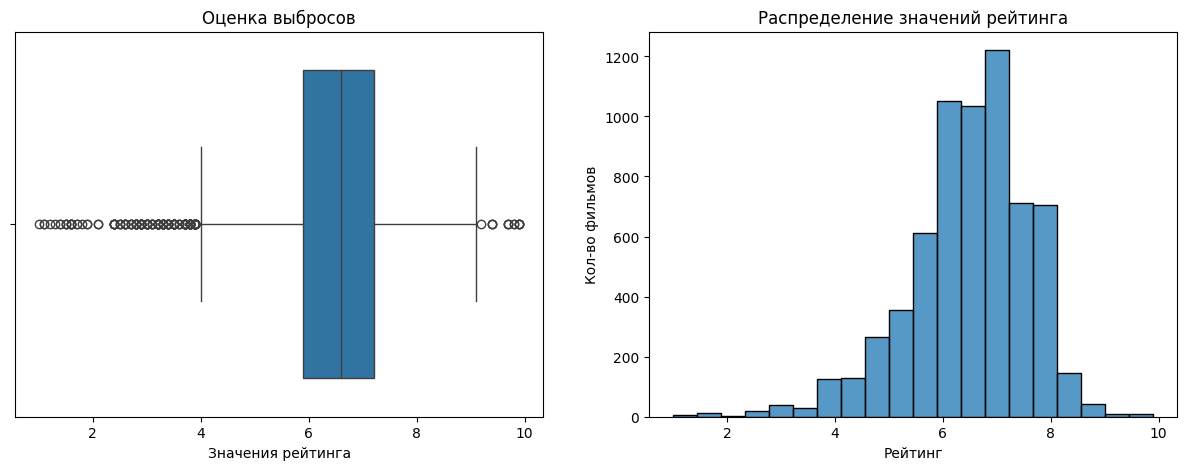

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['ratings'], ax=ax[0])
ax[0].set_title('Оценка выбросов')
ax[0].set_xlabel('Значения рейтинга')

sns.histplot(x=df['ratings'],bins=20, ax=ax[1]);
ax[1].set_title('Распределение значений рейтинга')
ax[1].set_xlabel('Рейтинг')
ax[1].set_ylabel('Кол-во фильмов')
plt.show()

Разброс значений слишком большой , так же присутствуют выбросы.

Оценим средние и медианные значения.

In [24]:
df['ratings'].mean(), df['ratings'].median()

(np.float64(6.4881730326737195), np.float64(6.6))

**Вывод**

Из графиков видно, что основная масса фильмов находиться в диапазоне рейтинга от 4 до 9 по версии сайта "Кинопоиск". Больше всего представлены фильмы с рейтингом 7 что примерно соответствует вывяленным нами средним и медианным значениям.

Замена пропусков по среднему и медиане на данном этапе исследования, может исказить финальный вывод.


**box_office**

Переменная содержит 4328(57.81%) пропусков от общего числа данных. Рассмотрим столбец подробней.

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.loc[df['box_office'] > 1]['box_office'].describe()

count         3134.00
mean      77064365.82
std      241178383.77
min             40.00
25%         101028.75
50%        2409099.35
75%       24569794.87
max     3073568690.79
Name: box_office, dtype: float64

Как и было замечено на этапе первичной оценки данных , колонка принимает очень странные значения. Посмотрим на графиках как распределяться данные.

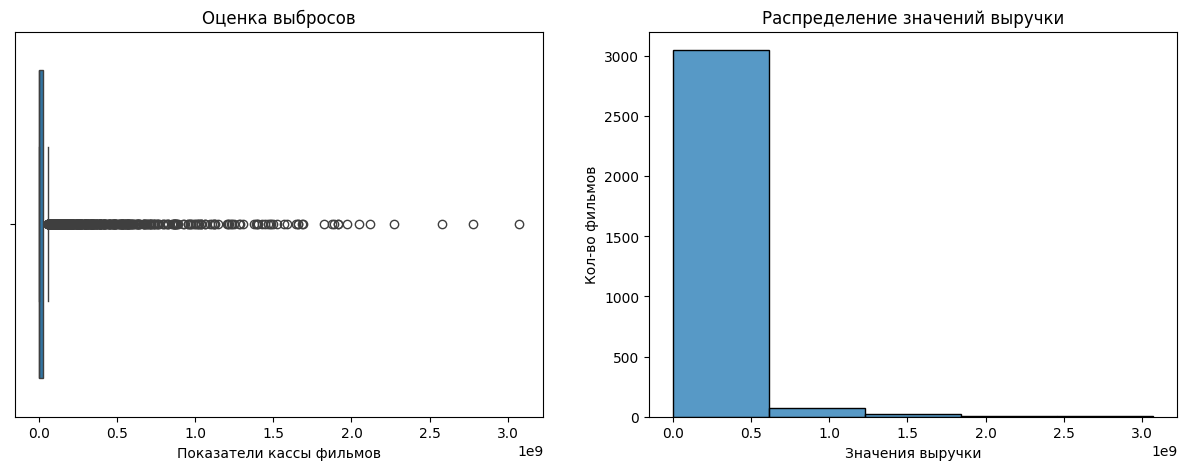

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['box_office'], ax=ax[0])
ax[0].set_title('Оценка выбросов')
ax[0].set_xlabel('Показатели кассы фильмов')

sns.histplot(x=df['box_office'],bins=5, ax=ax[1])
ax[1].set_title('Распределение значений выручки')
ax[1].set_xlabel('Значения выручки')
ax[1].set_ylabel('Кол-во фильмов')
plt.show()

Разброс значений слишком большой от 40 до 3,073,568,690 , очень похоже на то что некоторые значения записаны в сокращенном формате , вряд ли кассовые сборы могут составлять 40 рублей.

Исследуем эту гипотезу далее.

Оценим количество присутствующих данных по годам.

In [27]:
df.groupby(by='year')['box_office'].count()

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [28]:
df.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])

,median,mean
,box_office,box_office
year,,
2010,1700.00,23130.04
2011,3000.00,129383.17
2012,5660.00,54339.24
2013,3522.50,161954.92
2014,18160.00,26684415.27
2015,4920933.00,84940570.31
2016,3846679.41,91000569.85
2017,9968340.00,136032793.33


Похоже наша гипотеза подтвердилась , данные до и после 2015года сильно отличаются количественно. Предположу что до 2015 года данные записаны с сокращением тысяч.

**Вывод**

Видно что данные до *2015*года собирались мало и возможно содержали другой формат хранения данных.

Во избежание искажения исследования , было принято решения оставить как есть и в последующем анализе ссылаться на эту неточность.

**Столбцы : refundable_support, nonrefundable_support, budget, financing_source**

Имеют одинаковое и максимальное количество пропусков в 7154	(95.57%), рассмотрим каждый из них по отдельности.

В нашем наборе данных представленна информация как о зарубежном кино , так и об отечественном. Переменные **refundable_support, nonrefundable_support, financing_source** связаны между собой так как имеют отношение к Российкому кино. Из этого можно сделать вывод что оставшиеся пропуски в этих столбцах вызваны простым отсутсвием поддержки со стороны 'Министерства культуры', 'Фонда кино' и их можно заменить на 0.

In [29]:
df[['refundable_support', 'nonrefundable_support']] = (
    df[['refundable_support', 'nonrefundable_support']]).fillna(0)


In [30]:
df['refundable_support'].isna().sum() , df['nonrefundable_support'].isna().sum() 

(np.int64(0), np.int64(0))

Значения в столбце **financing_source** заменим просто пропуском.

In [31]:
df['financing_source'] = df['financing_source'].fillna('')

In [32]:
df['financing_source'].isna().sum()

np.int64(0)

**Budget**

In [33]:
df['budget'].describe()

count          332.00
mean     127229716.68
std      188588333.12
min              0.00
25%       42000000.00
50%       68649916.00
75%      141985319.50
max     2305074303.00
Name: budget, dtype: float64

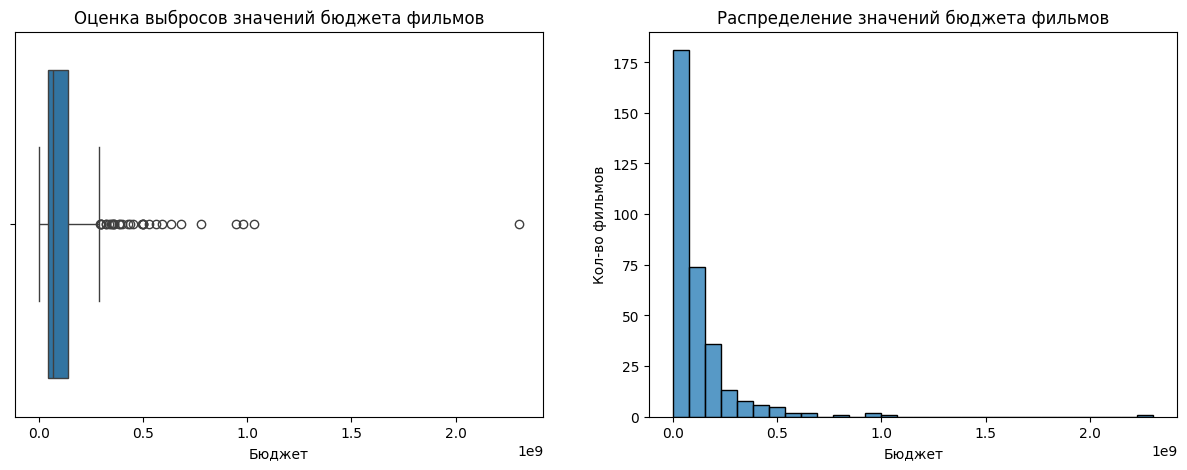

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=df['budget'], ax=ax[0])
ax[0].set_title('Оценка выбросов значений бюджета фильмов')
ax[0].set_xlabel('Бюджет')

sns.histplot(x=df['budget'],bins=30, ax=ax[1])
ax[1].set_title('Распределение значений бюджета фильмов')
ax[1].set_xlabel('Бюджет')
ax[1].set_ylabel('Кол-во фильмов')
plt.show()

Учитывая что переменная имеет одинаковое количество значений с такими столбцами как **refundable_support, nonrefundable_support** , предположу что значения budget по аналогии с refundable_support, nonrefundable_support указаны только для Русских фильмов получивших поддержку.

In [35]:
len(df.query('(refundable_support >= 0) & (nonrefundable_support >= 0) & (budget >= 0)'))

332

**Вывод**

Гипотеза подтвердилась.

По видимому указание бюджета , для фильмов без государственной поддержки , не было предусмотрено изначально.

Замена средним или медианой по всем данным не представляется возможной, поэтому оставим как есть.


#### Изучим дубликаты в датафрейме

In [36]:
df.duplicated().sum()

np.int64(0)

Явных дубликатов не выявлено.

Рассмотрим каждый представленный столбец отдельно.

In [37]:
df[df['punumber'].duplicated()]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,7.60,"драма,мелодрама,история",NaN,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,,6.80,"комедия,криминал",NaN,2010


Обнаружилось несколько дубликатов в номерах прокатных удостоверений.

In [38]:
df.loc[(df['punumber'] == 221154310) | (df['punumber'] == 221054410)]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,7.00,"мелодрама,комедия",NaN,2010
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,7.60,"драма,мелодрама,история",NaN,2010
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,7.40,"комедия,криминал",NaN,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,,6.80,"комедия,криминал",NaN,2010


По видимому причиной появления выступил человеческий фактор , так как даты выдачи полностью совпадают.

Обработаем дубликаты оставив в данных первое встречающиеся значения.

In [39]:
df.drop([4639, 5068], inplace=True);

Рассмотрим дубликаты в переменной с названием фильма.

In [40]:
#df[df['title'].duplicated()]
df['title'].duplicated().sum()

np.int64(713)

In [41]:
df[df['title'].duplicated()].head()

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,,6.80,"фантастика,боевик,триллер",NaN,2015
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,6.40,"мелодрама,комедия",NaN,2016
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.00,0.00,NaN,,7.70,"фэнтези,приключения,семейный",759526.00,2016
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.00,0.00,NaN,,8.20,"фэнтези,приключения,семейный",1125302.00,2016


Мы видим что на один и тот же фильм прокатные удостоверения выданы в разное время. Причиной этого могут служить разные цели , скажем одно удостоверение может  отвечать за прокат в кинотеатре , а второе за показ на ТВ , так же причиной получения нового прокатного удостоверения может выступать смена правообладателя или другие юридические тонкости.

По этой причини считаю не стоит удалять эти данные из нашей выборки.

#### Изучим категориальные значения


Рассмотрим значения в столбце `type`

In [42]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видно что некоторые значения представленные в столбце , начинаются с пробела. Проверим остальные переменные с категориальными значениями и обработаем этот недостаток в этом блоке.

Посмотрим на значения в `title`.

In [43]:
pd.set_option('display.max_rows', None) # Отключим ограничение на отображение строк.
sorted(df['title'], reverse=True)

['сНежное шоу',
 'альманах документальных фильмов "Вокзалы России: История, Любовь и Великие тайны…" Фильм первый "ВОКЗАЛЫ РОССИИ СВЯЗЬ ВРЕМЕН"',
 'Ярость / Fury',
 'Ярослав',
 'Японский Бог',
 'Япония многоликая',
 'Яна + Янко',
 'Ян Антонышев',
 'Ян Антонышев',
 'Ядовитая роза',
 'Явление.',
 'Явление природы',
 'Яблоко раздора',
 'Я-Учитель',
 'Я, снова я и мама',
 'Я, снова я и мама',
 'Я, мама и Борис Пастернак',
 'Я, Франкенштейн /По мотивам графического романа Кевина Гревье/',
 'Я, Клод Моне',
 'Я, Дэниел Блэйк',
 'Я, Алекс Кросс /По книге Джеймса Паттерсона/',
 'Я худею',
 'Я хочу туфли',
 'Я устал от тебя',
 'Я умею вязать',
 'Я тоже тебя люблю.',
 'Я тебя не люблю',
 'Я тебя не забыл',
 'Я так не думаю',
 'Я счастлив, что моя мать жива',
 'Я стану лучше',
 'Я сражаюсь с великанами',
 'Я свободен',
 'Я прихожу с дождем',
 'Я поэт Владимир Маяковский',
 'Я плюю на ваши могилы 3',
 'Я плюю на ваши могилы 2',
 'Я плюю на ваши могилы /По произведению Мейр Зархи/. Фильм содержит сц

Рассмотрим колонку с названиями студий.

In [44]:
sorted(df['film_studio'].astype(str))

[' АНО "Кинофорум"',
 ' Ауматик Интертейнмент, Блюмхаус Продакшнз и др.',
 ' ЗАО "Кинокомпания ФаворитФильм" по заказу ООО "ФАВОРИТ МЕДИА"',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм ',
 ' ООО "АВАТАРА"',
 ' ООО "КОСТАФИЛЬМ"',
 ' ООО "КиноФирма"',
 ' ООО "Кинокомпания "Студия ПРЕССИНГ"',
 ' ООО "Магнум-фильм"',
 ' ООО "Продюсерская фирма Игоря Толстунова"',
 ' ООО "Студия "Рой"',
 ' ООО "Студия 25", ООО "Медиа Арт Студио", ООО "Продюсерский центр "Синема Продакшн" ',
 ' ООО "Студия МЕТРАФИЛЬМС", Компания "TASSE film", Компания "SIRENA film"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК"',
 ' ООО "ТаББаК", ООО "Анимационная студия "Москва"',
 ' ООО "ТаББаК", ООО "Весёлая Компания"',
 ' ООО "Форс Медиа"',
 ' ООО "Хардкор", ООО "Патриот продак

Проделаем тоже самое с переменной `director` и `producer`.

In [45]:
sorted(df['director'].astype(str))

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Ёлкин Туйчиев',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Алов, В.Наумов',
 'А.Алов, В.Наумов',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф

In [46]:
sorted(df['producer'].astype(str), reverse=True)

['Яэль Фогель, Летиция Гонзалез',
 'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
 'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
 'Яцек Дросио, Михал Энглерт, Малгожата Шумовска',
 'Ярив Лернер',
 'Ярди Гасулл, Николас Матхи, Эдмон Рош',
 'Януш Вонхала, Кшиштоф Занусси, Илья Захаров, Александр Ковтунец, Влодзимеж Нидерхаус, Паоло Мария Спина',
 'Янн Ле Прадо, Мэттью Меткалф, Йохан де Фариа и др.',
 'Янг Ду, Джи Сонг, Ксиоме Ву',
 'Яна Бол, Жан Гуссен, Эмели Кристианс',
 'Яна Бол, Жан Гуссен, Эмели Кристианс',
 'Ян Шэнь, Мишель Меркт',
 'Ян Ковентри, Том Лассалли, Хади Хаджэйг',
 'Ян Де Бонт, Лукас Фостер',
 'Ян Бонат, Марк Мертенс',
 'Ян Арно, Сидони Дюма, Женевьева Лемаль',
 'Якоб Клауссен, Ули Путц',
 'Я.Хальпукова (псевдоним Яна Мартынец)',
 'Я.Трофимова',
 'Я.Трофимова',
 'Я.Райская',
 'Я.Лаптев (псевдоним Яков Раскалов)',
 'Я.Крали, С.Сельянов',
 'Я.Жалнин, И.Шемятов-Василенко',
 'Ютака Нарита, Сейджи Окуда, Тосио Судзуки',
 'Юсу

В категориальных переменных обнаружилась проблема , некоторые значения начинаются или заканчиваются с пробела ,обработаем этот недостаток применив метод strip.

In [47]:
dfcol = ['title', 'type', 'film_studio', 'director', 'producer']
for col in dfcol:
    df[col] = df[col].str.strip()

**Вывод**

- Изучив категориальные переменные, мы обнаружили одну закономерность , некоторые значения в наших столбцах начинались или заканчивались пробелом. Для чистоты дальнейшего анализа мы обработали этот недостаток.


#### Проверим количественные значения


Рассмотрим группу связанных друг с другом переменных **budget, nonrefundable_support, refundable_support** , как мы знаем в сумму бюджета уже включены возвратная и невозвратная поддержка , поэтому сумма этих показателей никак не может быть больше суммарного бюджета.

Проверим эту гипотезу.


In [48]:
zerobud = df.loc[df['budget'] < (df['nonrefundable_support'] + df['refundable_support'])]
display(zerobud.head(3))
len(zerobud)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00,2015
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,2015


17

Как мы видим есть несколько строк где выдвинутое нами предположение не верно , видимо в силу человеческого фактора , значения бюджета забыли указать попытаемся это исправить. Из произведенных нами ниже расчетов мы знаем что в среднем поддержка государства составляет 60% на основе этих вычислений попытаемся рассчитать адекватную замену нулевым значениям.

Расчитаем медианную сумму бюджета без гос.поддержки.

In [49]:
medbud = ((df['budget'].median()) * 0.4).round(2)
medbud

np.float64(27459966.4)

Для заполнения нулевых значений , суммируем расчитанную нами ранее медианную сумму без гос.поддержки(medbud) и указанную возвратную и невозвратную поддержку.

In [50]:
df.loc[zerobud.index, 'budget'] = medbud + (
    df.loc[zerobud.index, 'nonrefundable_support'] + df.loc[zerobud.index, 'refundable_support'])

**Вывод**

- Удалось незначительно улучшить поступившие нам данные , обработав пропуски и дубликаты , это должно положительно сказаться на ходе дальнейшего исследования.


In [ ]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

7486 7484 0.03


#### Добавим новые столбцы





Создадим два столбца , куда войдут первые значения имени и фамилии режиссёра и жанра. 

In [52]:
df['first_director'] = df['director'].str.split(',').str[0]
df['main_genre'] = df['genres'].str.split(',').str[0]

Создадим переменную в которой будет указана доля госсударственного участия в финансировании фильма.

In [53]:
df['financing'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget']).round(2)
df['financing'].unique()

array([ nan, 0.33, 0.7 , 0.61, 0.69, 0.62, 0.48, 0.68, 0.54, 0.35, 0.28,
       0.37, 0.46, 0.73, 0.5 , 0.13, 0.63, 0.66, 0.67, 0.21, 0.12, 0.41,
       0.25, 0.39, 0.53, 0.22, 0.34, 0.43, 0.36, 0.74, 0.65, 0.18, 0.42,
       0.32, 0.6 , 0.64, 0.3 , 0.85, 0.56, 0.59, 0.17, 0.51, 0.1 , 0.72,
       0.23, 0.44, 0.38, 0.31, 0.47, 0.16, 0.78, 0.45, 0.52, 0.27, 0.49,
       0.55, 0.24, 0.9 , 0.07, 0.29, 0.04, 0.57, 0.2 , 0.26, 0.84, 0.87,
       0.58, 0.08, 0.09])

Посмотрим на средние и медианные показатели этой переменной.

In [54]:
df['financing'].median() , df['financing'].replace([np.inf, -np.inf], np.nan).mean()

(np.float64(0.6), np.float64(0.525))

Создадим столбец с чистой прибылью фильма , для дальнейшего исслоедования.

In [55]:
df['profit'] = df['box_office'] - df['budget']

**Вывод**

Для дальнейшего исследования нам понадобилось создать следующие дополнительные столбцы :


- Мы создали две дополнительных переменных `first_director` и `main_genre` . куда вошли первые значения из уже имеющихся переменных `director` и `genres.`


- Создали переменную `financing` в которой отраженна доля гос. поддержки для Российского кино. Участие государства в финансировании фильмов составило примерно 60%.


- Создали столбец `profit` в котором отражено насколько фильм оказался финансово успешным.


- Проведённая в этом блоке работа по добавлению новых данных , поможет нам в дальнейшем исследовании.


### Проведем исследовательский анализ данных


**Посчитаем количество фильмов вышедших в прокат относительно всей массы фильмов представленных в данных.**

,Всего фильмов,Вышедшие в прокат,Процент
year,,,
2010,983,101,10.27%
2011,622,109,17.52%
2012,593,123,20.74%
2013,630,179,28.41%
2014,807,273,33.83%
2015,705,462,65.53%
2016,818,525,64.18%
2017,505,357,70.69%
2018,891,475,53.31%


Среднее кол-во фильмов в год за весь период: 748.4


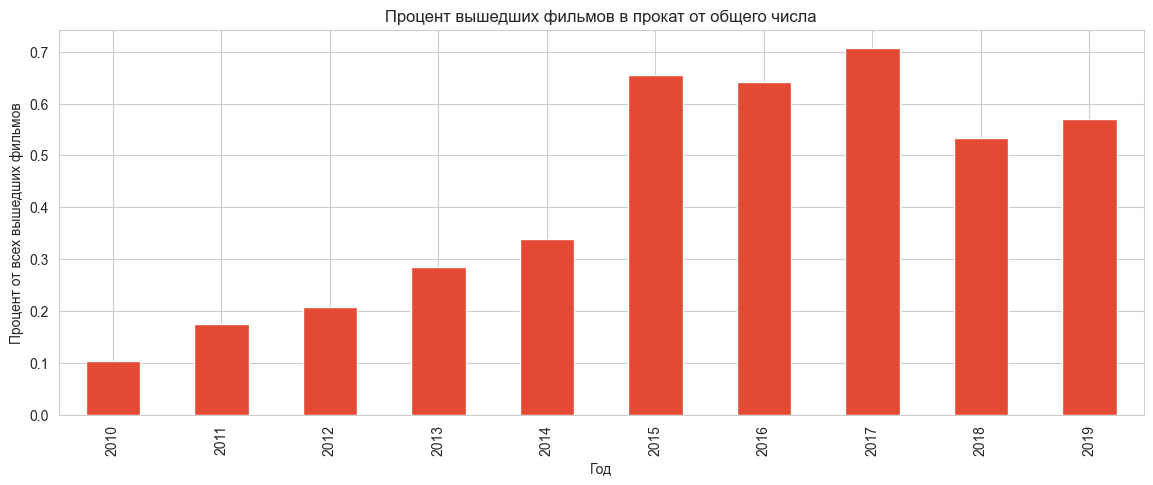

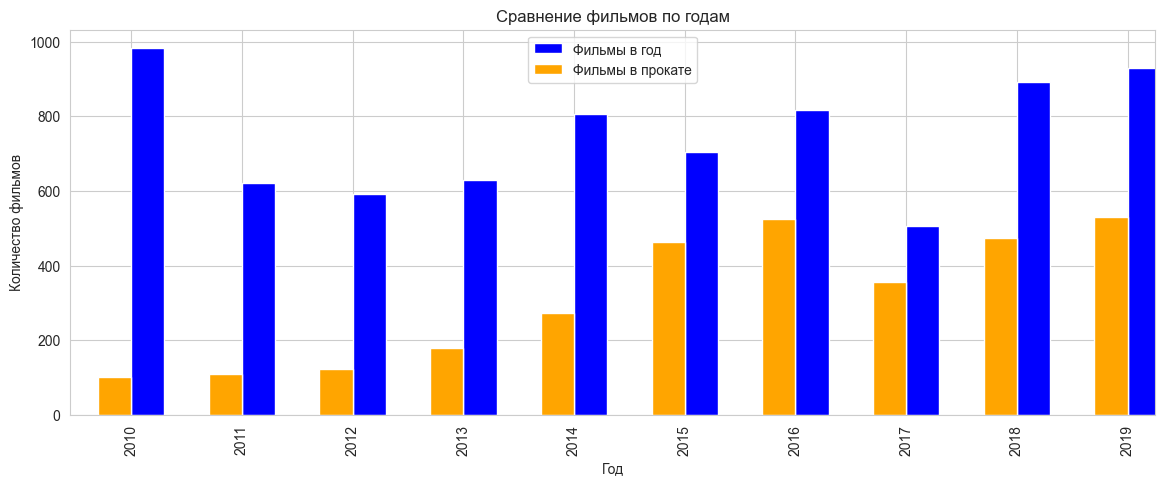

In [56]:
# Расчеты и таблица
film_per_year = df.groupby(by='year').size()
film_with_office = df.query('box_office > 0').groupby(by='year').size()
film_perc = (film_with_office / film_per_year)
film_stat = pd.concat(
    [film_per_year, film_with_office, film_perc.apply('{:.2%}'.format)], axis=1)
film_stat.columns = ['Всего фильмов', 'Вышедшие в прокат', 'Процент']
display(film_stat)
print(f'Среднее кол-во фильмов в год за весь период: {film_stat["Всего фильмов"].mean()}')
# Зададим стиль графиков
sns.set_style('whitegrid')
sns.set_palette('RdYlBu')
# Первый график
film_perc.plot(kind='bar', figsize=(14,5))
plt.title('Процент вышедших фильмов в прокат от общего числа')
plt.xlabel('Год')
plt.ylabel('Процент от всех вышедших фильмов')
#plt.legend(['Вышедшие фильмы']);
plt.show()

# Второй график
fig, ax = plt.subplots(figsize=(14, 5))
film_per_year.plot(kind='bar', color='blue', ax=ax, position=0, width=0.3, label='Фильмы в год')
film_with_office.plot(kind='bar', color='orange', ax=ax, position=1, width=0.3, label='Фильмы в прокате')
#ax.set_xlim(2012, 2019)
ax.legend()
ax.set_title('Сравнение фильмов по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество фильмов')
plt.show()

**Вывод**

- Из нашего исследования на этапе предобработки данных мы знаем что данные о прокате до **2015** года собирались достаточно плохо и в количественном отношении их досочно мало , что как раз таки достаточно хорошо видно на графике. Предлагаю при формировании вводов больше опираться на данные после **2014** года как более объёмные и точные. 


- Из этого блока исследования видно что самыми богатыми на прокат были **2015, 2016, 2017 года** , немного выбивается **2017**г в этом году общее количество фильмов самое низкое за всю нашу выборку, но при этом самый высокий процент фильмов в прокате.


- В последующие годы виден спад выхода фильмов в кинотеатрах примерно на 15%.


**Изучим, сумму сборов в прокате по годам.**

,box_office
year,
2010,2428654.00
2011,14102765.00
2012,6955423.00
2013,29799706.20
2014,7444951859.20
2015,39497365196.40
2016,47866299741.91
2017,48563707217.51
2018,49668403134.32


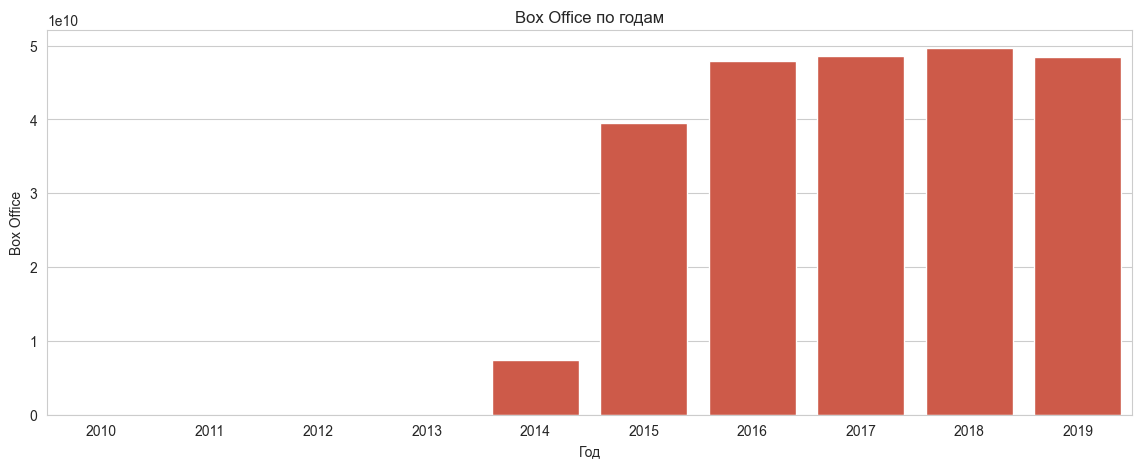

In [57]:
# Вывод таблицы
film_box = df.pivot_table(index='year', values='box_office', aggfunc='sum')
display(film_box)
film_box = film_box.reset_index()
# График
plt.figure(figsize=(14, 5))
sns.barplot(x='year', y='box_office', data=film_box)
plt.title('Box Office по годам')
plt.xlabel('Год')
plt.ylabel('Box Office')
plt.show()


**Вывод**

Из предыдущих блоков исследования , мы выявили что данные по сборам в прокате до 2015г. сильно искажены и на их основании мы не можем сделать каких либо релевантных выводов. Поэтому предлагаю сконцентрироваться на данных после 2014г.


- Из полученных нами ранее данных мы знаем что по общему количеству вышедших фильмов и фильмов в прокате **2015** год является средним и не обладает какими либо выбивающимися значениями. Но при этом является самым провальным в плане кассовых сборов. Напрашивается вывод что картины вышедшие в этом году были не слишком популярны у массового зрителя.

- В тоже время как мы уже знаем **2017**год обладает аномальными значениями относительно других лет. В этом году вышло самое малое количество фильмов и одновременно больше всего фильмов в прокат за весь период сбора данных. Но в тоже время эти показатели никаким образом не сказались на полученной выручке за год. Можно сделать вывод что в этом году вышли самые финансово успешные фильмы из всего нашего наборы данных.

- В **2018 и 2019** годах в прокат вышли всего лишь половина от всей массы представленных в этот период фильмов. Но сумма выручки в прокате не уступает показателям за другие года. Значит эти года были так же богаты на финансово успешные премьеры.

- **2016** год обладает средними показателями , но при этом сохраняет высокие показатели выручки.

Рассмотрев данные детально по годам можно сделать следующий вывод.

На кассовые сборы не так сильно влияет количество фильмов и их процент в прокате , как кассовая успешность нескольких вышедших в этот год фильмов , которые как мы видим и делают основную кассу.


**Посмотрим на среднюю и медианную сумму сборов для каждого года.**

,Средняя,Медиана
year,,
2010,23130.04,1700.00
2011,129383.17,3000.00
2012,54339.24,5660.00
2013,161954.92,3522.50
2014,26684415.27,18160.00
2015,84940570.31,4920933.00
2016,91000569.85,3846679.41
2017,136032793.33,9968340.00
2018,104565059.23,8891102.21


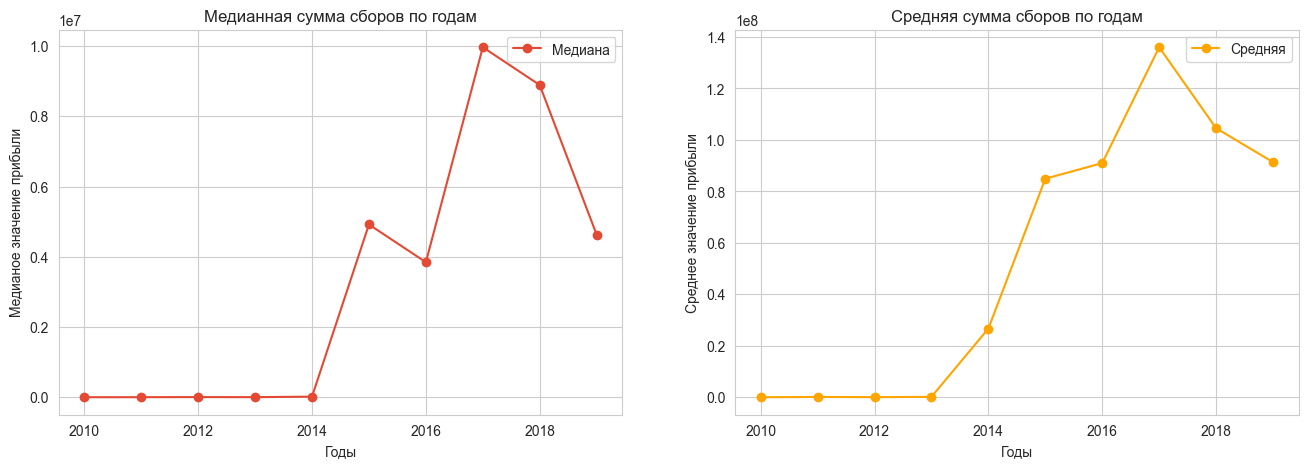

In [58]:
# Расчеты и вывод таблицы
film_median = df.pivot_table(index='year', values='box_office', aggfunc=('mean', 'median'))
film_median.columns = ['Средняя', 'Медиана']
display(film_median)

film_median = film_median.reset_index()

# Построение графика
fig, ax = plt.subplots(1,2, figsize=(16,5))
film_median.plot(x='year', y='Медиана', 
    title='Медианная сумма сборов по годам', 
    kind='line', style='o-', grid=True,  ax=ax[0]
)
ax[0].set_xlabel('Годы')
ax[0].set_ylabel('Медианое значение прибыли')

film_median.plot(x='year', y='Средняя', 
    title='Средняя сумма сборов по годам', 
    kind='line', color='orange', style='o-', grid=True,  ax=ax[1]
)
ax[1].set_xlabel('Годы')
ax[1].set_ylabel('Среднее значение прибыли')
plt.show()

**Вывод**

- Как и в предыдущем блоке исследования , данные раньше **2014**г. предлагаю не учитывать.


- Начиная с **2014** года на графиках видна положительная динамика роста доходности фильмов вышедших в прокат.


- Медианные и средние значения за **2016**год отличаются. Причиной может быть то что в этот год несколько фильмов собрали значительно большую кассу чем другие , что и повлияло на среднее значение выручки в этот период.


- В **2017** году видна пиковый показатель полученной выручки от выхода фильмов в прокат , что согласуется с нашим предыдущим выводом о выходе в этот год , большего количества кассовых фильмов.


- в **2018 и 2019** годах виден спад и возврат значений к показателям **2015** года что говорит нам о в среднем снижении интереса со стороны зрителей к фильмам вышедшим в этих годах.


**Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год**

In [59]:
df['age_restriction'] = df['age_restriction'].str.split('-').str[0]

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year,,,,,
2015,379054578.37,13616082008.91,11368120870.27,5432308367.44,8701799371.41
2016,150228848.67,12204446524.39,16664548541.74,6793929818.87,12053146008.24
2017,229598930.00,7851427660.67,18745042900.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503602346.96,8760085501.15,10104974623.41
2019,17746066.82,12680198773.67,12753418984.60,10121796303.64,12852548650.86


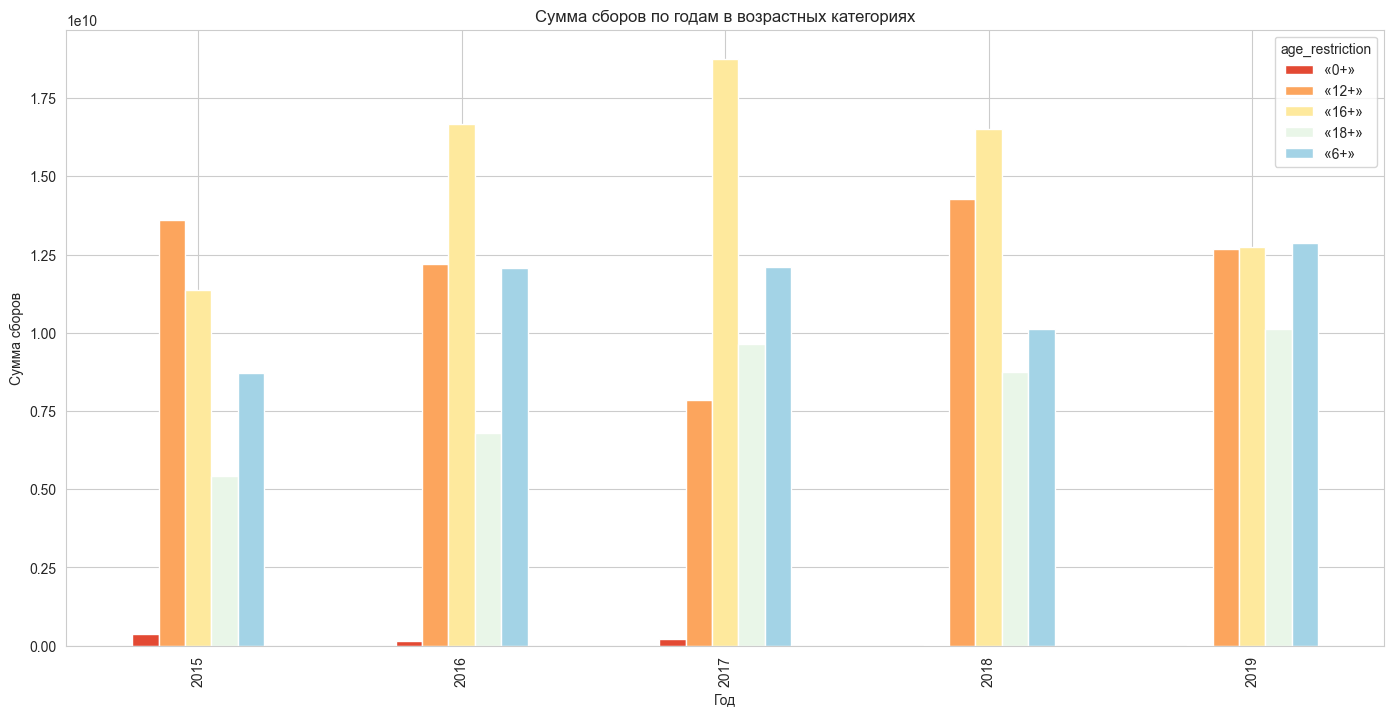

In [60]:
# Расчеты и вывод таблицы
film_age = (df.query('(year >=2015) & (box_office > 1)').pivot_table(
    index=['year'], columns= ['age_restriction'], 
    values='box_office', aggfunc='sum')
)#.reset_index
display(film_age)
film_age = film_age.reset_index()

# Построение графика
ax = film_age.plot(
    x='year', 
    title='Сумма сборов по годам в возрастных категориях',
    kind='bar', 
    grid=True, 
    figsize=(17, 8)
)

ax.set_xlabel('Год')  
ax.set_ylabel('Сумма сборов') 
plt.show()


**Дополнительно рассмотрим среднию кассу за год в представленных возрастных категориях**

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year,,,,,
2015,9975120.48,189112250.12,68072580.06,41153851.27,164184893.80
2016,3664118.26,148834713.71,92069328.96,44992912.71,172187800.12
2017,76532976.67,191498235.63,154917709.92,65656432.52,268580936.57
2018,6489800.42,212944651.65,105792322.74,48939025.15,148602567.99
2019,5915355.61,149178809.10,71648421.26,55310362.31,158673440.13


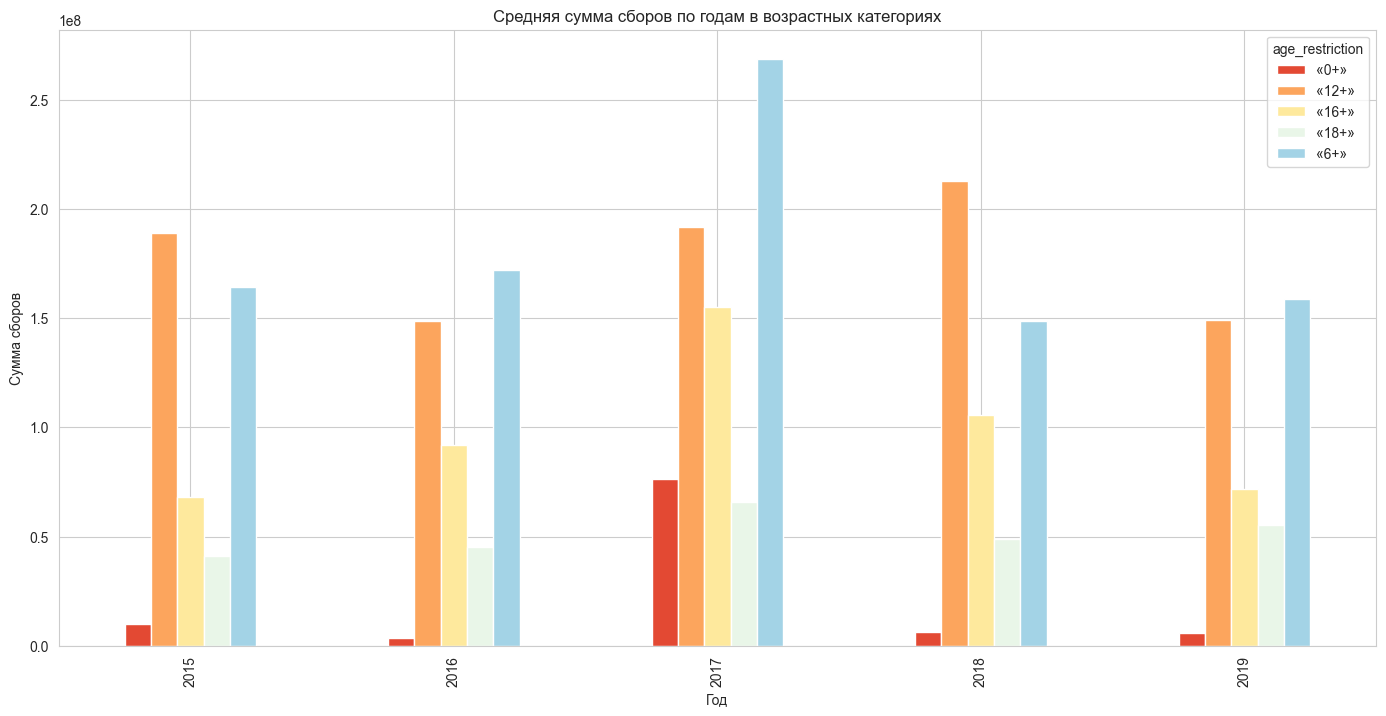

In [61]:
film_age_mean = (df.query('(year >=2015) & (box_office > 1)').pivot_table(
    index=['year'], columns= ['age_restriction'], 
    values='box_office', aggfunc='mean')
)#.reset_index
display(film_age_mean)
film_age_mean = film_age_mean.reset_index()

# Построение графика
film_age_mean.plot(
    x='year', title='Средняя cумма сборов по годам в возрастных категориях'
    , kind='bar', grid=True, figsize=(17,8))
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

**Вывод**

- Фильмы категории "0+" для любой зрительской аудитории , имеют в обоих категориях самые низкие показатели. Думаю это связанно со спецификой данной категории , поход в кино с ребенком до 6 лет представляется проблематичным , а для детей старше 6 лет и всех остальных зрителей этот контент не представляет ценности.


- В свою очередь категория «6+» - для детей старше 6 лет , имеет стабильно хорошие финансовые показатели , в обозримых нами категориях в **2017году** даже является лидером по сумме средних сборов. Предположу что причиной этому может служить то что эта группа является ярким представителем так называемого "семейного кино" , на такие сеансы дети приходят в сопровождении своих родителей что кратно увеличивает доходность картины.


- Киноленты категории «12+» - для детей старше 12 лет , в проведенном нами исследовании занимают близкое к лидирующим позициям по показателям выручки место. Предположу что это можно объяснить широким диапазоном аудитории которым может быть интересны данные фильмы. В эту категорию входят как и мультипликационные ленты которые будут интересны детям , так романтические, комедийные и супергеройские ленты которые будут интересны более зрелой аудитории.


- Группа «16+» - для детей старше 16 лет по сумме всех вырученных средств является лидером , что достаточно легко объяснить тем что в этой категории представлены такие жанры как (мистика, ужасы, фэнтэзи , блокбастеры, черные комедии) и охватывают максимально широкую аудиторию кинолюбителей. Плюс ко всему в этой категории в большей степени представлены более платежеспособные клиенты.


- Аутсайдером нашего исследования выступает категория «18+» - запрещено для детей. Думаю это легко объяснимо тем что фильмов в с такими ограничениями снимается не так много , а так же присутствует специфика проката таких картин в виде ночных сеансов которые не все могут посетить. Так же возрастные ограничения очень жестко отсекают основные целевые аудитории кинотеатров.


Так же видно небольшое изменение трендов проката по годам.


**Общий вывод по блоку**

Мы провели исследования по всей выборке данных присутствующих в нашем датафрейме и пришли к следующему :

- Не все фильмы представленные в данных предназначались для проката , Доля прокатных картин растет линейно начиная с **2010** года . а в **2018 и 2019** годах намечается спад относительно общего темпа.


- Не удаётся сделать какие либо выводы до **2015** года из за не репрезентативности данных по полученной выручке. С **2015**года виден устойчивый рост вырученных в прокате и вывод на средний показатель в последующие годы.


- Средняя и медианная сумма сборов за исключением **2016** в который по видимому было несколько более кассовых картин , коррелируют друг с другом.


- Полученная прибыль очень сильно зависит от возрастной категорией в которой выходит фильм.



### Исследуем фильмы, которые получили государственную поддержку

**Расмотрим приоритетные для финансирования жанры**

main_genre
драма          93
комедия        74
мультфильм     31
мелодрама      15
триллер        15
фантастика     11
фэнтези        11
ужасы          10
военный         9
семейный        7
приключения     7
боевик          6
детектив        5
мюзикл          4
детский         4
история         4
биография       3
криминал        3
спорт           3
реальное ТВ     1
dtype: int64

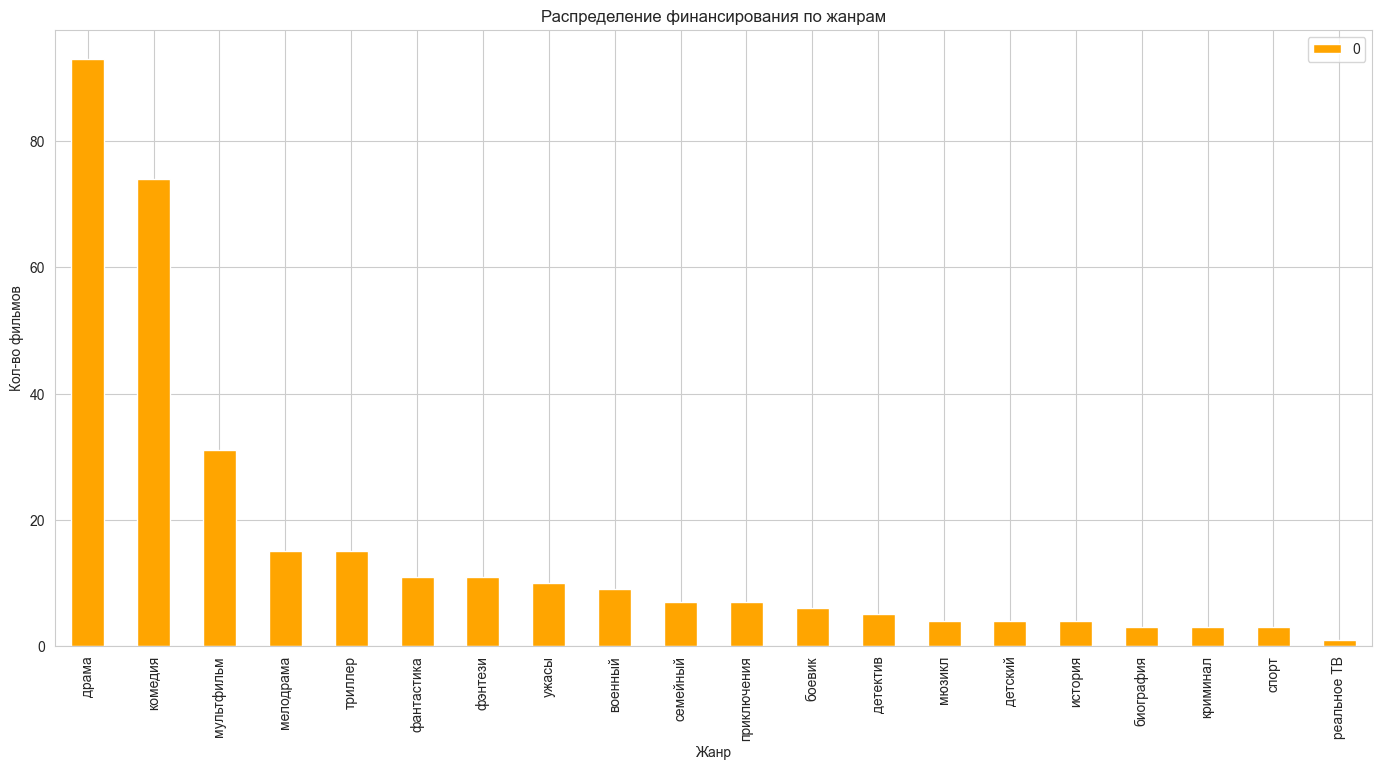

In [62]:
# Расчеты и таблица
df_rus = df.query('(refundable_support >= 0) & (nonrefundable_support >= 0) & (budget >= 0)')
df_gen = df_rus.groupby('main_genre').size()
display(df_gen.sort_values(ascending=False))
df_gen = df_gen.reset_index()

# График
df_gen.sort_values(0, ascending=False).plot(
    x='main_genre', color='orange', title='Распределение финансирования по жанрам'
    , kind='bar', grid=True, figsize=(17,8))
plt.xlabel('Жанр')
plt.ylabel('Кол-во фильмов')
plt.show()

**Вывод**

- Целевыми жанрами для финансирования являються : **драма, комедия, мультфильм**.


- Остальные жанры представленны слабо.

**Рассмотрим в какие годы более активно велась поддержка русского кино.**

,Кол-во
Год,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70


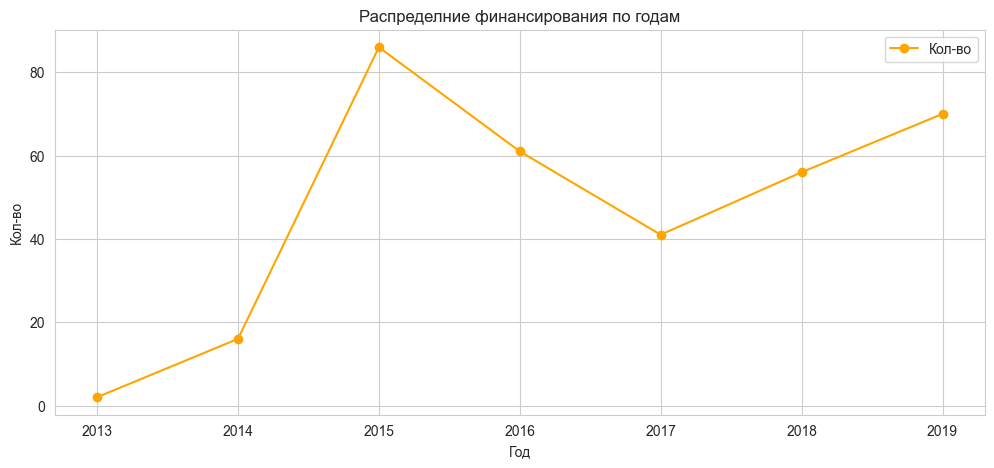

In [63]:
# Расчеты и вывод таблицы
df_rus_year = df_rus.groupby('year').size().rename_axis('Год').to_frame()
df_rus_year.columns = (['Кол-во'])
display(df_rus_year)
# График
df_rus_year.plot(title='Распределние финансирования по годам', xlabel='Год',
   ylabel='Кол-во',  kind='line', color='orange', style='o-', grid=True, figsize = (12,5))
plt.show()

**Вывод**

- Из Графика видно что до 2013года поддержка со стороны государства отсутствовала , все фильмы до этого моменты были сняты на частные деньги.


- В **2013**году началась практика финансирования кино со стороны государства , и своего пика достигла в **2015**году , следующие 2 года намечается значительный спад и только начиная с **2017** года значения стремиться с показателям **2015** года.


**Посмотрим какое министерство активней всего принимало участие в финансировании**

In [64]:
display(df_rus['financing_source'].value_counts().to_frame())
# df_rus.groupby('financing_source').sort_values().plot(x='main_genre', color='orange', title='Распределение финансирования по жанрам'
#     , kind='bar', grid=True, figsize=(17,8))
# plt.xlabel('Жанр')
# plt.ylabel('Кол-во фильмов')
# plt.show()

,count
financing_source,
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


Проанализируем срез данных где финансовая поддержка оказывалась "Министерство культуры, Фонд кини" , возможно удасться заметить какую либо закономерность.

In [65]:
df_rus.query('financing_source == "Министерство культуры, Фонд кино"')

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,first_director,main_genre,financing,profit
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+»,0.00,...,86210067.00,"Министерство культуры, Фонд кино",6.70,драма,4731239.50,2014,В.Глаголева,драма,0.54,-81478827.50
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,...,50459966.40,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,2014,А.Зайцев,мелодрама,0.46,-40225950.30
2092,Батальонъ,111000715,2015-01-29 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+»,0.00,...,436437176.00,"Министерство культуры, Фонд кино",7.10,"драма,военный,история",451812221.70,2015,Д.Месхиев,драма,0.13,15375045.70
2108,ОХРАНА,111001115,2015-02-11 12:00:00+00:00,Художественный,"ООО ""Амкарт""",Россия,А.Прошкин,Д.Пиркулов,«16+»,0.00,...,68490606.00,"Министерство культуры, Фонд кино",5.00,"драма,комедия",310738.00,2015,А.Прошкин,драма,0.66,-68179868.00
2364,Левиафан.,111009714,2014-09-11 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Звягинцев,"А.Роднянский, С.Мелькумов",«18+»,0.00,...,267288892.00,"Министерство культуры, Фонд кино",6.90,"драма,криминал",88120041.10,2014,А.Звягинцев,драма,0.34,-179168850.90
2535,72 часа,111011815,2015-07-15 12:00:00+00:00,Художественный,"ООО ""Продюсерская компания Николая Расторгуева""",Россия,К.Ангелина,"И.Николенко, Н.Расторгуев",«12+»,10000000.00,...,55729424.00,"Министерство культуры, Фонд кино",7.00,"военный,драма",10355541.11,2015,К.Ангелина,военный,0.66,-45373882.89
2537,ВСТАВАЙ И БЕЙСЯ,111008615,2015-05-05 12:00:00+00:00,Художественный,"ООО ""ЛИГА ПРОДАКШН""","Россия, Италия",Стефано Лоренци,"Жанфранко Пиччоли, Надежда Горшкова, Катерина ...",«18+»,0.00,...,139357211.00,"Министерство культуры, Фонд кино",6.40,драма,144040.00,2015,Стефано Лоренци,драма,0.43,-139213171.00
2538,Наследники (2015),111018515,2015-10-22 12:00:00+00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+»,7153119.00,...,50218741.00,"Министерство культуры, Фонд кино",6.10,"мюзикл,фэнтези,комедия",194780.00,2015,В.Хотиненко,мюзикл,0.70,-50023961.00
2769,Коробка.,111013215,2015-08-21 12:00:00+00:00,Художественный,"ООО ""Телесто-фильм""",Россия,Э.Бордуков,"Е.Гликман, М.Дегтярь, Я.Живов",«12+»,10000000.00,...,58078451.00,"Министерство культуры, Фонд кино",6.90,"драма,спорт,комедия",9977812.50,2015,Э.Бордуков,драма,0.59,-48100638.50
2803,Битва с экстрасенсами,111011315,2015-07-20 12:00:00+00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+»,0.00,...,59560746.00,"Министерство культуры, Фонд кино",5.40,"фэнтези,приключения",6000.00,2015,И.Кордзаия,фэнтези,0.43,-59554746.00


Мы видим что совместная поддержка "Министерство культуры, Фонд кино" оказывалась исключительно **"Художественному"** типу фильмов.

Рассмотрим два среза по **"Министерство культуры" и "Фонд кино"** , попытаемся отследить предпочтения каждого министерства по жанрам и типам.

In [66]:
df_rus.pivot_table(
    index='financing_source', columns='type', values='budget', aggfunc='count').rename_axis('Министерство')

type,Анимационный,Документальный,Художественный
Министерство,,,
Министерство культуры,2.00,1.00,161.00
"Министерство культуры, Фонд кино",NaN,NaN,22.00
Фонд кино,29.00,NaN,117.00


In [67]:
display(
    df_rus.query('financing_source == "Министерство культуры"')['main_genre'].value_counts().head())
df_rus.query('financing_source == "Фонд кино"')['main_genre'].value_counts().head()

main_genre
драма        61
комедия      29
мелодрама    13
военный       7
триллер       7
Name: count, dtype: int64

main_genre
комедия       43
мультфильм    28
драма         22
фантастика     7
триллер        7
Name: count, dtype: int64

**Вывод**

- Их этого блока исследования видно , что "Фонд кино" является практически единоличным спонсором мультфильмов из общего числа в 31 профинансированных мультипликационных картин , "фонд кино" приняло участие в 29.


- Поддержка документальных фильмов со стороны государства практически не представлена ни одним из министерств. Гос. органы отдают предпочтение **анимации и художественным** фильмам.


- В жанровой классификации доминируют **драма , комедия , мультфильм** , что коррелирует с общими трендами в сфере кино.


### Попытаемся оценить финансовый успех фильмов с гос. участием.

Посмотрим на какой основе в основном оказывалась поддержка Русского кино.

,year,Невозвратная поддержка,Возвратная поддержка
0,2013,134347945.00,0.00
1,2014,501002299.00,71000000.00
2,2015,3019088340.00,637153119.00
3,2016,3381655482.00,921500000.00
4,2017,2464624781.00,719346881.00
5,2018,2784969465.00,662000000.00
6,2019,3976000000.00,928000000.00


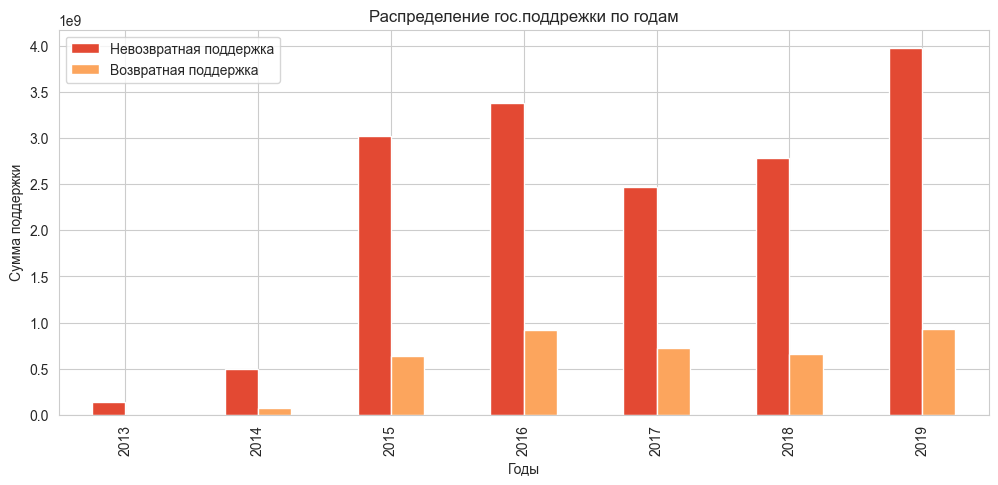

In [68]:
# Таблица и расчеты
suport = df_rus.pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
suport.columns = ['Невозвратная поддержка', 'Возвратная поддержка']
suport = suport.reset_index()
display(suport)
# График
suport.plot(
    x='year', kind='bar', title='Распределение гос.поддрежки по годам', 
    xlabel='Годы', ylabel='Сумма поддержки', figsize=(12,5))
plt.show()

Как мы видим в **2013 и 2014**годах государство выделяло деньги практически на безвозмездной основе. Как видно из графика в последующие годы это немного поменялось.

В основном гос. поддержка проходила на невозвратной основе.


**Посмотрим на соотношение прибыли и затраченого бюджета.**

,Сборы,Бюджет
year,,
2013,20322385.10,255435390.00
2014,1017422166.60,1329944749.40
2015,5785285418.14,7903429005.40
2016,6081707839.10,7637322647.20
2017,10865075300.96,7112092500.80
2018,9934069010.25,7110503964.60
2019,8409627454.63,12750326575.40


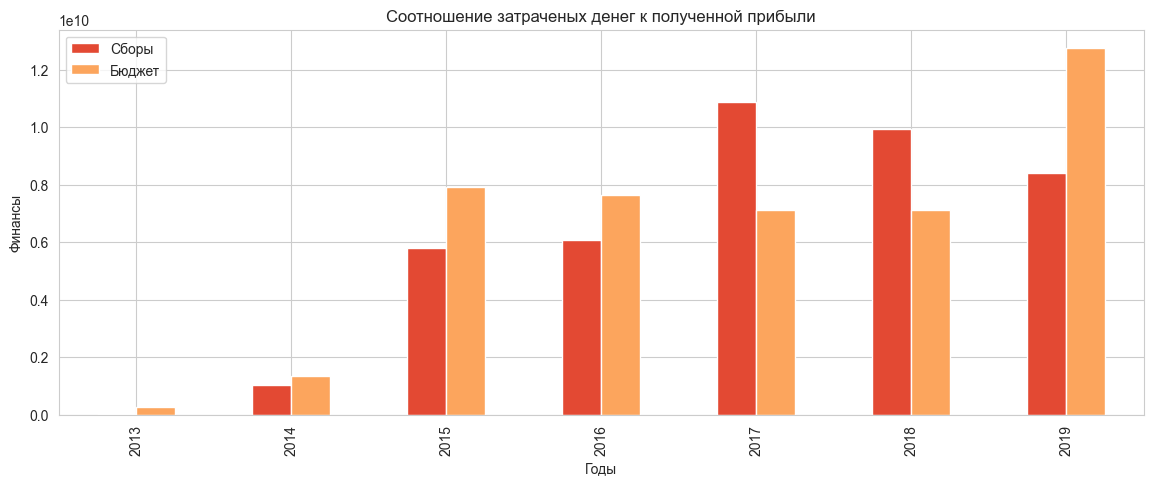

In [69]:
# Расчеты и таблица
dif = df_rus.pivot_table(index='year', values=['budget', 'box_office'], aggfunc='sum')
dif.columns = ['Сборы', 'Бюджет']
display(dif)
dif = dif.reset_index()
total = dif['Сборы'].sum() - dif['Бюджет'].sum()
#formatted_number = f"{number:,.0f}".replace(',', ' ')
# Вывод графика
dif.plot(
    x='year', kind='bar', title='Соотношение затраченых денег к полученной прибыли', 
    xlabel='Годы', ylabel='Финансы' ,figsize=(14,5))
plt.show()

Только **2017 и 2018** были финансово успешными для фильмов с гос. поддержкой. Показатели в остальные годы являются убыточными , рассмотрим это ниже

**Проследим как менялась динамика полученной прибыли по годам.**

,Чистая прибыль
year,
2013,-235113004.90
2014,-312522582.80
2015,-2076144603.26
2016,-1536908728.10
2017,3858582800.16
2018,2823565045.65
2019,-2852906403.77


Сумма убытков за все время составила -1,985,545,258


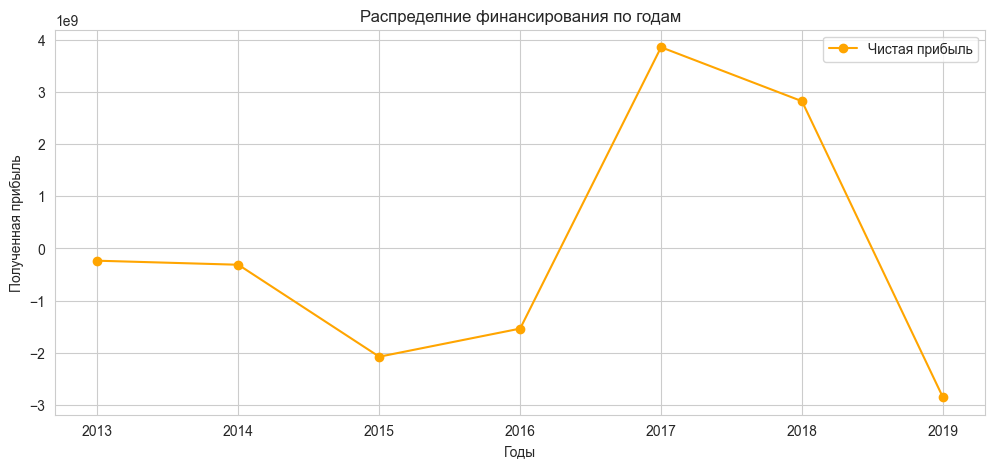

In [70]:
# Таблица
minus = df_rus.pivot_table(index='year', values='profit', aggfunc='sum')
minus.columns = ['Чистая прибыль']
display(minus)
minus = minus.reset_index()
# график
minus.plot(x='year', title='Распределние финансирования по годам',
           xlabel='Годы' , ylabel='Полученная прибыль',
    kind='line', color='orange', style='o-', grid=True, figsize = (12,5))
print(f'Сумма убытков за все время составила {total:,.0f}')

Как мы видим из графиков , только **2017 и 2018** года оказались успешными для русского кино получившего гос.поддержку.

В остальном фильмы не оправдали ожиданий инвесторов и принесли убытки. В целом за весь период нашей выборки гос. органы и изначальные инвесторы понесли убытки в размере 1,985,545,258. 

**Посмотри на количество фильмов вышедших в прокат с привлечением гос. средств.**

In [71]:
len(df_rus.loc[df_rus['box_office'] > 1])

318

Практически все фильмы , были предназначены для проката, из 332 картин , 318 вышли в прокат.

**Расмотрим сколько из них смогли окупить вложенный в них бюджет.**

In [72]:
film_profit = df_rus.loc[df_rus['box_office'] > df_rus['budget']]
print(f'Сумма успешных в прокате фильмов {len(film_profit)}')
perc = '{:.2%}'.format((len(film_profit) / len(df_rus)))
print(f'Процент успешных в прокате фильмов {perc}')

Сумма успешных в прокате фильмов 73
Процент успешных в прокате фильмов 21.99%


**Вывод**

- Процент окупившихся в прокате фильмов составил рекордно низкие 22% , всего 73 картины смогли отбить вложенные в них деньги. Финансирование кинокартин со стороны государства является однозначно  не финансово успешным мероприятием.


- Убытки за весь период для всех привлеченных лиц для фильмов с гос. финансированием составили 1,985,545,258 рублей.


- Выявить и сравнить аналогичные показатели для всех оставшихся фильмов не из России , не представляеться возможным из за отсутсвия данных о бюджете.

**Оценим распределение пользовательского рейтинга в отношении фильмов получивших финансирование.**

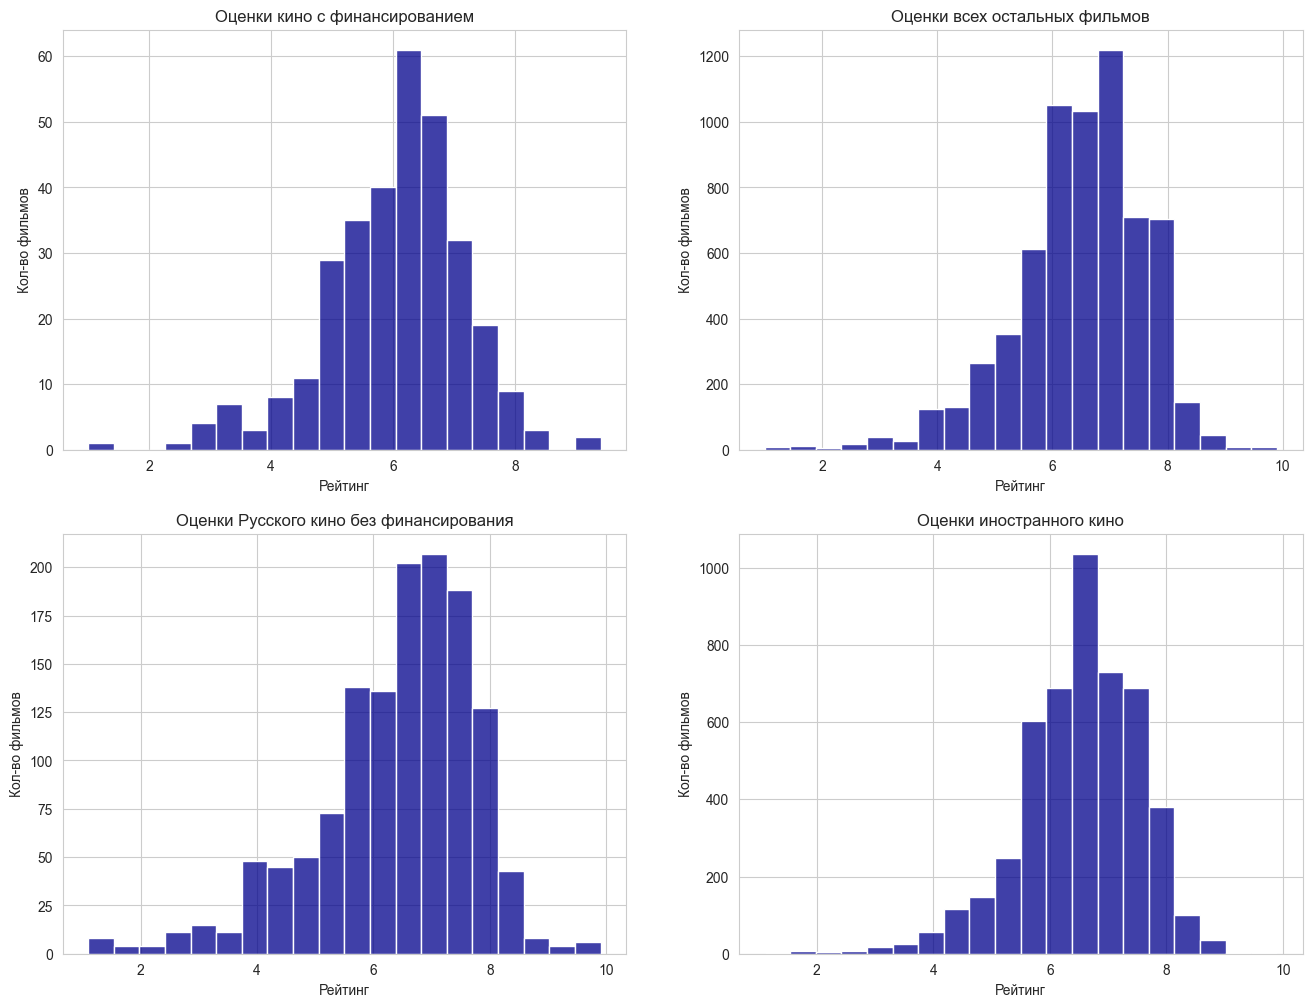

In [73]:
# фильмы без гос.поддрежки
rus_wo_fin = df.loc[(df['production_country'].isin(['Россия', 'СССР'])) & (df['budget'].isna())]
# иностранные фильмы
non_rus = df.loc[~df['production_country'].isin(['Россия', 'СССР'])]
# все фильмы с исключением гос. поддержки
df_other = df.drop(df_rus.index)
fig, ax = plt.subplots(2,2, figsize=(16,12))
sns.histplot(x='ratings',  data=df_rus, bins=20, color='darkblue', ax=ax[0,0])
ax[0,0].set_title('Оценки кино с финансированием')
ax[0,0].set_xlabel('Рейтинг')
ax[0,0].set_ylabel('Кол-во фильмов')

sns.histplot(x='ratings',  data=df, bins=20, color='darkblue', ax=ax[0,1])
ax[0,1].set_title('Оценки всех остальных фильмов');
ax[0,1].set_xlabel('Рейтинг')
ax[0,1].set_ylabel('Кол-во фильмов')

sns.histplot(x='ratings', data=rus_wo_fin, bins=20, color='darkblue', ax=ax[1,0])
ax[1,0].set_title('Оценки Русского кино без финансирования')
ax[1,0].set_xlabel('Рейтинг')
ax[1,0].set_ylabel('Кол-во фильмов')

sns.histplot(x='ratings', data=non_rus, bins=20, color='darkblue', ax=ax[1,1])
ax[1,1].set_title('Оценки иностранного кино')
ax[1,1].set_xlabel('Рейтинг')
ax[1,1].set_ylabel('Кол-во фильмов')
plt.show()

**Вывод**

- Оценки со стороны зрителей для кино с гос. поддержкой в среднем незначительно уступают фильмам из разных стран и Русским фильмам не умеющими такой поддержки. Разницу с иностранными фильмами легко объяснить разницей бюджетов и раскрученностью некоторых франшиз. Разницу с фильмами без гос. поддержки можно объяснить отсутствием редактуры со стороны гос. органов и большей свободой в выборе жанра и возрастной категории.

**Общий вывод по блоку**

Мы проанализировали рынок Русского кино с привлечением гос. средств и пришли к следящим выводам :

- Приоритет в выделении средств оказывался следующим жанрам кино **драма, комедия, мультфильм**.


- Интенсивность оказания поддержки менялась с годами. Интенсивно росла начиная с **2013** года достигнув своего пика в **2015** дальше интерес гос. органов к этой программе немного уменьшился и вновь поддержка начала набирать обороты только с **2017** года.


- За исключением **2017 и 2018** годов , Российские фильмы не окупали вложенные в них средства. В целом за весь период фильмы с првлечением гос. средств были убыточны.


### Общий вывод

Нам на вход поступило два датафрейма содержащие данные от министерства культуры о киноиндустрии в с период с **2011 по 2019** гола в России. После объединения и очистки данных от дубликатов и пропусков мы перешли к анализу и сделал следующие выводы :

- Не все представленные в данных киноленты , были предназначены для выхода в прокат , данные содержали информацию о сериалах , скетчевых шоу и фильмах вышедших в СССР. Начиная с **2011** года в процентном соотношении доля фильмов для широкого проката , стремительно увеличивалась с каждым годом и достигла своего пикового значения в **2017** году со значением в **70%** от всей вышедшей продукции в этом году. В среднем в период с **2011 по 2015** год доля проката составляла в среднем **20%**. С **2015** года ситуация сильно поменялась и доля проката составила **60%**. **Выводом их этого может служить то что очевидно изначально рынок кинолент не был ориентирована на широкий прокат , а был сконцентрирована на сьемках сериалов и других шоу , но со временем ситуация поменялась.**


- Не смотря на то что данные до **2015** года искажены и из них не представляется возможным извлечь какие либо представляющую для нас ценность выводы по сумме вырученных средств. С **2014** года намечается устойчивая динамика роста по сумме оборота на Российском рынке кинопроката в последующие годы и выход на средний показатель в **42,000,000,000** рублей без учета затраченных средств. Самым кассовым можно назвать **2017** год , в этом году вышло меньше всего кинолент (505 штук при среднем кол-ве в 700) но процент прокатных кинолент составил **70%** , а данные по выручке находиться на том же уровне что и в **2016 2018 и 2019** годах когда выходило порядка 800 лент в год.


- При анализе возрастных групп наметились следующие закономерности. Группа **«0+» - для любой зрительской аудитории** в силу узкой специфики в основном для детей младше 6 лет , имеет самые низкие показатели доходности. Категория **«6+» - для детей старше 6 лет** выглядит намного более финансово стабильной и даже является лидером за **2017** год в показателях средней прибыли , в связи с тем что такие сеансы посещают в основном семьи с детьми что увеличивает показатели прибыли. Группа **«12+» - для детей старше 12 лет** занимает второе место по выручке , включая в себя практически всех представителей жанров кино , представляет интерес для широкого круга кинолюбителей. Лидеров по прибыли выступает **«16+» - для детей старше 16 лет** , эта группа захватывает больший сегмент платежеспособных клиентов и большинство кассовых картин выходит в этой категории. Категория **«18+» - запрещено для детей** обладает не лучшими показателями выручки по причине , малого количества снимаемых фильмов в этой категории и специфики проката и отсекает целевую группу посетителей кинотеатров в виде детей до 18 лет. **Основным выводом из этого может служить то что значительную общую кассу проката , в том или ином виде приносят лица до 16 лет**


- Перейдем к нашей основной цели исследования, проанализируем Русские фильмы, получившие гос. поддержку. Как мы видим из исследования целевой группой для финансирования была выбрана категория **художественных фильмов** на втором месте **мультипликация**, а поддержка **документальных** фильмов практически отсутствовала. По жанровым предпочтениям гос. Органов, сложилась следующая картина : на первом месте **драма** , на втором **комедия** и на третьем **мультфильм** , остальные жанры получили значительно меньше внимания. Зрительская оценка таких фильмов оказалась ниже оценок фильмов из других стран и фильмов без гос. участия , такая ситуация вероятней всего вызвана четкими рамками установленными гос. органами , что пришлось не по вкусу широкому зрителю. Доля фильмов чья прибыль превысила затраты , составила рекордно низкие **22%**. Только в **2017 и 2018** годах удалось получить хоть какую либо прибыль , все остальные представленные в выборке годы были убыточными. Общая сумма понесенных финансовых потерь за весь период составила 1,985,545,258 рублей. **Выводом из этого следует что поддержка Русского кино в основном является финансово убыточным и служит скорее для продвижения национальных идей и увеличения доли Российского кино на рынке проката.**
